<center><img src="https://i.imgur.com/hkb7Bq7.png" width="500"></center>


### **Prof. José Manuel Magallanes, PhD**

* Professor, Departamento de Ciencias Sociales, Pontificia Universidad Católica del Perú, [jmagallanes@pucp.edu.pe](mailto:jmagallanes@pucp.edu.pe)

* Visiting Professor, Evans School of Public Policy and Governance / Senior Data Science Fellow, eScience Institute, University of Washington, [magajm@uw.edu](mailto:magajm@uw.edu)
_____

_____

<a id='home'></a>

# Introduction to Python

### Using Python for Pre Processing

In the session we will see the use of Python to:

1. Collect data as dataframes into Python

2. Preprocess a data frame:
    * [Subset data](#subset)
    * [Fix column names](#fixcolnames)
    * [Look for non-standar missing values](#lookfornas)
    * [Clean cell values](#cleancellvalues)
    * [Format data types](#formatdtypes)


3. Merge both tables:
    * [Basic merge](#merging)
    * [Fuzzy merge](#fuzzmerging)


4. Prepare a file for further analysis
    * [Scaling](#scaling)
    * [Exporting](#exporting)



## 1. Collect data tables into Python

In [2]:
# Location of data file
linkFile="https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Table.xlsx"

Reading in a table from a file using pandas, since it is an Excel file, I requires **openpyxl**:

In [2]:
# available in my computer?
!pip show openpyxl

Name: openpyxl
Version: 3.0.10
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /Users/JoseManuel/opt/anaconda3/envs/WinterSchool-3_11/lib/python3.11/site-packages
Requires: et_xmlfile
Required-by: 


If not available, please go to Anaconda and install it. Once installed, or if available, continue:

In [3]:
# choose the right function:
import pandas as pd

hdiFile=pd.read_excel(linkFile) # you might get an error!

HTTPError: HTTP Error 403: Forbidden

In [4]:
# you may need to add user-agent

storage_options = {'User-Agent': 'Mozilla/5.0'}
hdiFile = pd.read_excel(linkFile, storage_options=storage_options)

[Home](#home)
______

## 2.  Pre Processing

<a id='subset'></a>

### Subset data

The object **hdiFile** is saving the information as a data frame. Just keep what you need; let's check the data head and tail:

In [5]:
hdiFile.head(10)

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.4,NaN,SDG8.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN
5,NaN,NaN,2021,NaN,2021,NaN,2021,a,2021,a,2021,NaN,2021,b,2020
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.85966,NaN,66933.00454,NaN,5,NaN,3
8,2,Norway,0.961,NaN,83.2339,NaN,18.1852,c,13.00363,NaN,64660.10622,NaN,6,NaN,1
9,3,Iceland,0.959,NaN,82.6782,NaN,19.163059,c,13.76717,NaN,55782.04981,NaN,11,NaN,2


In [6]:
hdiFile.tail()

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
271,NaN,Column 2: UNDESA (2022a).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,"Column 3: CEDLAS and World Bank (2022), ICF Ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,NaN,"Column 4: Barro and Lee (2018), ICF Macro Demo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,"Column 5: IMF (2022), UNDESA (2022b), United N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,Column 6: Calculated based on data in columns ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above, you do not see countries neither in the first rows nor in the last ones. There are rows at the begining and at the end that are not needed. 

Let's find the row indexes that have the data:

In [7]:
# the problem is at the tail:
hdiFile.tail(72)

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
204,NaN,Nauru,..,NaN,63.617,NaN,11.69042,e,..,NaN,17729.74084,NaN,..,NaN,..
205,NaN,Somalia,..,NaN,55.2803,NaN,..,NaN,..,NaN,1017.96785,NaN,..,NaN,..
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,Human development groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,Very high human development,0.896,NaN,78.521301,NaN,16.506485,NaN,12.323006,NaN,43751.596458,NaN,—,NaN,—
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Column 2: UNDESA (2022a).,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,"Column 3: CEDLAS and World Bank (2022), ICF Ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,NaN,"Column 4: Barro and Lee (2018), ICF Macro Demo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,"Column 5: IMF (2022), UNDESA (2022b), United N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# is this better?
hdiFile.iloc[7:206,:]

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
7,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.85966,NaN,66933.00454,NaN,5,NaN,3
8,2,Norway,0.961,NaN,83.2339,NaN,18.1852,c,13.00363,NaN,64660.10622,NaN,6,NaN,1
9,3,Iceland,0.959,NaN,82.6782,NaN,19.163059,c,13.76717,NaN,55782.04981,NaN,11,NaN,2
10,4,"Hong Kong, China (SAR)",0.952,NaN,85.4734,d,17.27817,NaN,12.22621,NaN,62606.8454,NaN,6,NaN,4
11,5,Australia,0.951,NaN,84.5265,NaN,21.05459,c,12.72682,NaN,49238.43335,NaN,18,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,Korea (Democratic People's Rep. of),..,NaN,73.2845,NaN,10.78317,p,..,NaN,..,NaN,..,NaN,..
203,NaN,Monaco,..,NaN,85.9463,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..
204,NaN,Nauru,..,NaN,63.617,NaN,11.69042,e,..,NaN,17729.74084,NaN,..,NaN,..


In [9]:
# subsetting as new DF (copy)
hdiRaw=hdiFile.iloc[7:206,:].copy()
hdiRaw

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
7,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.85966,NaN,66933.00454,NaN,5,NaN,3
8,2,Norway,0.961,NaN,83.2339,NaN,18.1852,c,13.00363,NaN,64660.10622,NaN,6,NaN,1
9,3,Iceland,0.959,NaN,82.6782,NaN,19.163059,c,13.76717,NaN,55782.04981,NaN,11,NaN,2
10,4,"Hong Kong, China (SAR)",0.952,NaN,85.4734,d,17.27817,NaN,12.22621,NaN,62606.8454,NaN,6,NaN,4
11,5,Australia,0.951,NaN,84.5265,NaN,21.05459,c,12.72682,NaN,49238.43335,NaN,18,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,Korea (Democratic People's Rep. of),..,NaN,73.2845,NaN,10.78317,p,..,NaN,..,NaN,..,NaN,..
203,NaN,Monaco,..,NaN,85.9463,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..
204,NaN,Nauru,..,NaN,63.617,NaN,11.69042,e,..,NaN,17729.74084,NaN,..,NaN,..


[Home](#home)
______

<a id='fixcolnames'></a>

### Fix column names

Notice that **hdiRaw** do not have the right column names. So we need to recover them from **hdiFile**:

In [10]:
hdiFile.iloc[[3,4],:]

,Back,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN


As you see, the column names are in different positions:

In [11]:
# and
hdiFile.iloc[4,:2].to_list()

['HDI rank', 'Country']

In [12]:
hdiFile.iloc[3,2:].to_list()

['Human Development Index (HDI) ',
 nan,
 'Life expectancy at birth',
 nan,
 'Expected years of schooling',
 nan,
 'Mean years of schooling',
 nan,
 'Gross national income (GNI) per capita',
 nan,
 'GNI per capita rank minus HDI rank',
 nan,
 'HDI rank']

In [13]:
# save column names 
RealHeaders=hdiFile.iloc[4,:2].to_list()+hdiFile.iloc[3,2:].to_list()
# these are:
RealHeaders

['HDI rank',
 'Country',
 'Human Development Index (HDI) ',
 nan,
 'Life expectancy at birth',
 nan,
 'Expected years of schooling',
 nan,
 'Mean years of schooling',
 nan,
 'Gross national income (GNI) per capita',
 nan,
 'GNI per capita rank minus HDI rank',
 nan,
 'HDI rank']

Let's avoid all the "ranks":

In [14]:
RealHeaders[1:-3]

['Country',
 'Human Development Index (HDI) ',
 nan,
 'Life expectancy at birth',
 nan,
 'Expected years of schooling',
 nan,
 'Mean years of schooling',
 nan,
 'Gross national income (GNI) per capita',
 nan]

In [15]:
# keep just those columns
hdiRaw=hdiRaw.iloc[:,1:-3]
hdiRaw

,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
7,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.85966,NaN,66933.00454,NaN
8,Norway,0.961,NaN,83.2339,NaN,18.1852,c,13.00363,NaN,64660.10622,NaN
9,Iceland,0.959,NaN,82.6782,NaN,19.163059,c,13.76717,NaN,55782.04981,NaN
10,"Hong Kong, China (SAR)",0.952,NaN,85.4734,d,17.27817,NaN,12.22621,NaN,62606.8454,NaN
11,Australia,0.951,NaN,84.5265,NaN,21.05459,c,12.72682,NaN,49238.43335,NaN
...,...,...,...,...,...,...,...,...,...,...,...
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Korea (Democratic People's Rep. of),..,NaN,73.2845,NaN,10.78317,p,..,NaN,..,NaN
203,Monaco,..,NaN,85.9463,NaN,..,NaN,..,NaN,..,NaN
204,Nauru,..,NaN,63.617,NaN,11.69042,e,..,NaN,17729.74084,NaN


Now, put the right names:

In [16]:
#renaming
hdiRaw.columns=RealHeaders[1:-3]
#result:
hdiRaw

,Country,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN
7,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.85966,NaN,66933.00454,NaN
8,Norway,0.961,NaN,83.2339,NaN,18.1852,c,13.00363,NaN,64660.10622,NaN
9,Iceland,0.959,NaN,82.6782,NaN,19.163059,c,13.76717,NaN,55782.04981,NaN
10,"Hong Kong, China (SAR)",0.952,NaN,85.4734,d,17.27817,NaN,12.22621,NaN,62606.8454,NaN
11,Australia,0.951,NaN,84.5265,NaN,21.05459,c,12.72682,NaN,49238.43335,NaN
...,...,...,...,...,...,...,...,...,...,...,...
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Korea (Democratic People's Rep. of),..,NaN,73.2845,NaN,10.78317,p,..,NaN,..,NaN
203,Monaco,..,NaN,85.9463,NaN,..,NaN,..,NaN,..,NaN
204,Nauru,..,NaN,63.617,NaN,11.69042,e,..,NaN,17729.74084,NaN


We still have column names with missing values, let's get rid of those:

In [17]:
BetterHeaders=hdiRaw.columns.dropna().to_list()
#result
BetterHeaders

['Country',
 'Human Development Index (HDI) ',
 'Life expectancy at birth',
 'Expected years of schooling',
 'Mean years of schooling',
 'Gross national income (GNI) per capita']

In [18]:
#subsetting again
hdiRaw=hdiRaw.loc[:,BetterHeaders]
hdiRaw.head()

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
7,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
11,Australia,0.951,84.5265,21.05459,12.72682,49238.43335


Notice above that the columns:
* Have acronyms in parenthesis.
* Have spaces between words.

Let's see what can be done:

In [19]:
# bye anything between parenthesis
hdiRaw.columns.str.replace('\(.+\)',"", regex=True)

Index(['Country', 'Human Development Index  ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income  per capita'],
      dtype='object')

In [20]:
# bye anything between parenthesis, bye leading-trailing spaces
hdiRaw.columns.str.replace('\(.+\)',"", regex=True).str.strip()

Index(['Country', 'Human Development Index', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income  per capita'],
      dtype='object')

In [21]:
# bye anything between parenthesis, bye leading-trailing spaces, title case
hdiRaw.columns.str.replace('\(.+\)',"", regex=True).\
                          str.strip().\
                          str.title()

Index(['Country', 'Human Development Index', 'Life Expectancy At Birth',
       'Expected Years Of Schooling', 'Mean Years Of Schooling',
       'Gross National Income  Per Capita'],
      dtype='object')

Let's keep this last one for a while:

In [22]:
#changing column names
hdiRaw.columns=hdiRaw.columns.str.replace('\(.+\)',"", regex=True).\
                          str.strip().\
                          str.title()
#so
hdiRaw

,Country,Human Development Index,Life Expectancy At Birth,Expected Years Of Schooling,Mean Years Of Schooling,Gross National Income Per Capita
7,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
11,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN
202,Korea (Democratic People's Rep. of),..,73.2845,10.78317,..,..
203,Monaco,..,85.9463,..,..,..
204,Nauru,..,63.617,11.69042,..,17729.74084


Now, it is time to decide how the we want as the shorter column name:

* Same title without spaces:

In [23]:
hdiRaw.columns.str.replace(" ",'',regex=False)

Index(['Country', 'HumanDevelopmentIndex', 'LifeExpectancyAtBirth',
       'ExpectedYearsOfSchooling', 'MeanYearsOfSchooling',
       'GrossNationalIncomePerCapita'],
      dtype='object')

* Some acronyms: Let's do this step by step.

In [24]:
# each column names splitted:
[name.split() for name in hdiRaw.columns]

[['Country'],
 ['Human', 'Development', 'Index'],
 ['Life', 'Expectancy', 'At', 'Birth'],
 ['Expected', 'Years', 'Of', 'Schooling'],
 ['Mean', 'Years', 'Of', 'Schooling'],
 ['Gross', 'National', 'Income', 'Per', 'Capita']]

In [25]:
# first letter of each word
[[word[0] for word in name.split()] for name in hdiRaw.columns]

[['C'],
 ['H', 'D', 'I'],
 ['L', 'E', 'A', 'B'],
 ['E', 'Y', 'O', 'S'],
 ['M', 'Y', 'O', 'S'],
 ['G', 'N', 'I', 'P', 'C']]

In [26]:
# final result
[''.join([word[0] for word in name.split()]) for name in hdiRaw.columns]

['C', 'HDI', 'LEAB', 'EYOS', 'MYOS', 'GNIPC']

Let's keep the first alternative:

In [27]:
hdiRaw.columns=hdiRaw.columns.str.replace(" ",'',regex=False)

Finally...

In [28]:
hdiRaw

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita
7,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
11,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN
202,Korea (Democratic People's Rep. of),..,73.2845,10.78317,..,..
203,Monaco,..,85.9463,..,..,..
204,Nauru,..,63.617,11.69042,..,17729.74084


[Home](#home)
______

<a id='lookfornas'></a>

### Look for non-standar missing values

First check a cell that is full of non-word/non-digit characters:

In [29]:
# full match!
[hdiRaw.iloc[:,1].str.fullmatch("\W+",na=False)]

[7      False
 8      False
 9      False
 10     False
 11     False
        ...  
 201    False
 202     True
 203     True
 204     True
 205     True
 Name: HumanDevelopmentIndex, Length: 199, dtype: bool]

The above result is telling you if whether there is or there is not a full match (True/False). You can use that to keep the rows where this is _True_:

In [30]:
# a quick look...
hdiRaw.iloc[:,1][hdiRaw.iloc[:,1].str.fullmatch("\W+",na=False)]

202    ..
203    ..
204    ..
205    ..
Name: HumanDevelopmentIndex, dtype: object

Let's do this for every column:

In [31]:
i=0
hdiRaw.iloc[:,i][hdiRaw.iloc[:,i].str.fullmatch("\W+",na=False)]

Series([], Name: Country, dtype: object)

In [32]:
i=1
hdiRaw.iloc[:,i][hdiRaw.iloc[:,i].str.fullmatch("\W+",na=False)]

202    ..
203    ..
204    ..
205    ..
Name: HumanDevelopmentIndex, dtype: object

Using **for** loop:

In [33]:
for i in range(hdiRaw.shape[1]):
    print(hdiRaw.iloc[:,i][hdiRaw.iloc[:,i].str.fullmatch("\W+",na=False)])
# you might error!

Series([], Name: Country, dtype: object)
202    ..
203    ..
204    ..
205    ..
Name: HumanDevelopmentIndex, dtype: object


AttributeError: Can only use .str accessor with string values!

Using **try**:

In [34]:
for i in range(hdiRaw.shape[1]):
    try:
        print(hdiRaw.iloc[:,i][hdiRaw.iloc[:,i].str.fullmatch("\W+",na=False)])
    except:
        pass

Series([], Name: Country, dtype: object)
202    ..
203    ..
204    ..
205    ..
Name: HumanDevelopmentIndex, dtype: object
203    ..
205    ..
Name: ExpectedYearsOfSchooling, dtype: object
202    ..
203    ..
204    ..
205    ..
Name: MeanYearsOfSchooling, dtype: object
202    ..
203    ..
Name: GrossNationalIncomePerCapita, dtype: object


This means that the people who created this data set used ".." to represent **missing values**. Let's replace those values:

In [35]:
# replacing !
hdiRaw.replace(to_replace=[".."],
               value=None,
               inplace=True)

#result
hdiRaw

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita
7,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
11,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN
202,Korea (Democratic People's Rep. of),None,73.2845,10.78317,None,None
203,Monaco,None,85.9463,None,None,None
204,Nauru,None,63.617,11.69042,None,17729.74084


[Home](#home)
______

<a id='cleancellvalues'></a>

### Cleaning cell values

Do the current cell values have issues?

* Keeping complete data

In [36]:
# with all missing (after the first column)
hdiRaw[hdiRaw.iloc[:,1:].isna().all(axis=1)]

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita
73,HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
123,MEDIUM HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
168,LOW HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN


In [37]:
# with at least one missing (after the first column)
hdiRaw[hdiRaw.iloc[:,1:].isna().any(axis=1)]

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita
73,HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
123,MEDIUM HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
168,LOW HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN
201,OTHER COUNTRIES OR TERRITORIES,NaN,NaN,NaN,NaN,NaN
202,Korea (Democratic People's Rep. of),None,73.2845,10.78317,None,None
203,Monaco,None,85.9463,None,None,None
204,Nauru,None,63.617,11.69042,None,17729.74084
205,Somalia,None,55.2803,None,None,1017.96785


Then, netx code will only keep complete data, and save it as a new data frame:

In [38]:
hdiComplete=hdiRaw[~hdiRaw.iloc[:,1:].isna().any(axis=1)].copy()
#
hdiComplete

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita
7,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454
8,Norway,0.961,83.2339,18.1852,13.00363,64660.10622
9,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981
10,"Hong Kong, China (SAR)",0.952,85.4734,17.27817,12.22621,62606.8454
11,Australia,0.951,84.5265,21.05459,12.72682,49238.43335
...,...,...,...,...,...,...
196,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
197,Central African Republic,0.404,53.8947,8.040172,4.334,966.058611
198,Niger,0.4,61.5763,6.957112,2.116717,1239.866936
199,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


* Making sure columns of _text_ are clean:

In [39]:
# get rid of leading and trailing spaces in text cells
hdiComplete.Country=hdiComplete.Country.str.strip()

* Checking  numeric columns

In [40]:
hdiComplete.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 200
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   HumanDevelopmentIndex         191 non-null    object
 1   LifeExpectancyAtBirth         191 non-null    object
 2   ExpectedYearsOfSchooling      191 non-null    object
 3   MeanYearsOfSchooling          191 non-null    object
 4   GrossNationalIncomePerCapita  191 non-null    object
dtypes: object(5)
memory usage: 9.0+ KB


Numbers have been recognised as **object** type. It might be due to having a non numeric value in one cell, or because it **had** a non-numeric.

In [41]:
# can you apply math?
hdiRaw.iloc[:,1:].max()

HumanDevelopmentIndex                 0.962
LifeExpectancyAtBirth               85.9463
ExpectedYearsOfSchooling           21.05459
MeanYearsOfSchooling              14.090967
GrossNationalIncomePerCapita    146829.7006
dtype: object

You just need to give format.

In [42]:
hdiClean=hdiComplete.copy()

[Home](#home)
______

<a id='formatdtypes'></a>

### Formatting

From above, we just need to format the numeric columns:

* **Formatting into numeric type**:

In [43]:
# as easy as:
hdiClean[hdiClean.columns[1:]]=hdiClean.iloc[:,1:].apply(pd.to_numeric)

In [44]:
#recheck
hdiClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 7 to 200
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       191 non-null    object 
 1   HumanDevelopmentIndex         191 non-null    float64
 2   LifeExpectancyAtBirth         191 non-null    float64
 3   ExpectedYearsOfSchooling      191 non-null    float64
 4   MeanYearsOfSchooling          191 non-null    float64
 5   GrossNationalIncomePerCapita  191 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.4+ KB


That was easy!

In [66]:
hdiFormat=hdiClean.copy()

[Home](#home)
______


## 3. Integrating

<a id='merging'></a>

### Basic merging

As our data is clean and formatted (to the best of our knowledge), this process should be easy:

In [67]:
demoFormat=pd.read_pickle("demoFormat.pkl")

Take a look at the column names:

In [68]:
demoFormat.columns

Index(['Country', 'Regimetype', 'Overallscore', 'Electoralprocessandpluralism',
       'Functioningofgovernment', 'Politicalparticipation', 'Politicalculture',
       'Civilliberties'],
      dtype='object')

In [69]:
hdiFormat.columns

Index(['Country', 'HumanDevelopmentIndex', 'LifeExpectancyAtBirth',
       'ExpectedYearsOfSchooling', 'MeanYearsOfSchooling',
       'GrossNationalIncomePerCapita'],
      dtype='object')

If we are confident we did a good cleaning and formatting, this step should be easy:

In [70]:
# left_on= / right_on NOT NEEDED (only when column names differ)
hdiFormat.merge(demoFormat,left_on='Country', right_on='Country')

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita,Regimetype,Overallscore,Electoralprocessandpluralism,Functioningofgovernment,Politicalparticipation,Politicalculture,Civilliberties
0,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,Full democracy,8.90,9.58,8.93,7.78,9.38,8.82
1,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,Full democracy,9.75,10.00,9.64,10.00,10.00,9.12
2,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,Full democracy,9.18,10.00,8.21,8.89,9.38,9.41
3,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,Full democracy,8.90,10.00,8.57,7.78,8.75,9.41
4,Denmark,0.948,81.3753,18.714800,12.960490,60364.785950,Full democracy,9.09,10.00,8.93,8.33,9.38,8.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mali,0.428,58.9414,7.423038,2.310000,2132.629443,Authoritarian,3.48,2.42,0.00,5.56,5.63,3.82
141,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,Authoritarian,2.13,0.00,0.00,3.89,5.00,1.76
142,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,Authoritarian,1.43,1.25,0.00,1.67,1.88,2.35
143,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,Authoritarian,3.22,2.00,1.14,3.89,4.38,4.71


Notice the amount of rowd **returned above**, and compare it with the amount of rows in each data frame:

In [71]:
len(hdiFormat),len(demoFormat)

(191, 167)

The smallest amount of rows is the maximum amount you expect during merge. Let's check the key values that were not matched:


In [72]:
onlyHDI=set(hdiFormat.Country)-set(demoFormat.Country)
onlyDEMO=set(demoFormat.Country)-set(hdiFormat.Country)

In [73]:
onlyHDI

{'Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Belize',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Czechia',
 "Côte d'Ivoire",
 'Dominica',
 'Eswatini (Kingdom of)',
 'Grenada',
 'Hong Kong, China (SAR)',
 'Iran (Islamic Republic of)',
 'Kiribati',
 'Korea (Republic of)',
 "Lao People's Democratic Republic",
 'Liechtenstein',
 'Maldives',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Moldova (Republic of)',
 'Palau',
 'Palestine, State of',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Solomon Islands',
 'South Sudan',
 'Syrian Arab Republic',
 'Tanzania (United Republic of)',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Türkiye',
 'Vanuatu',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam'}

In [74]:
onlyDEMO

{'Bolivia',
 'Cape Verde',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'East Timor',
 'Eswatini',
 'Hong Kong',
 'Iran',
 'Ivory Coast',
 'Laos',
 'Moldova',
 'North Korea',
 'Palestine',
 'Republic of the Congo',
 'Russia',
 'South Korea',
 'Syria',
 'Taiwan',
 'Tanzania',
 'Turkey',
 'Venezuela',
 'Vietnam'}

[Home](#home)
______


<a id='fuzzmerging'></a>

### Fuzzy Merge

The previous objects (onlyDEMO, onlyHDI) inform the values not matched in the other data frame. 
If you want to recover some of these values, you may follow these steps (you may need to install **thefuzz**):

In [75]:
from thefuzz import process as fz

# take a country from onlyDEMO
# and get the country that matches the most in OnlyHDI

[(fz.extractOne(demo, onlyHDI),demo) for demo in sorted(onlyDEMO)]

[(('Bolivia (Plurinational State of)', 90), 'Bolivia'),
 (('Cabo Verde', 80), 'Cape Verde'),
 (("Lao People's Democratic Republic", 86), 'Czech Republic'),
 (('Congo (Democratic Republic of the)', 95),
  'Democratic Republic of the Congo'),
 (('Timor-Leste', 82), 'East Timor'),
 (('Eswatini (Kingdom of)', 90), 'Eswatini'),
 (('Hong Kong, China (SAR)', 90), 'Hong Kong'),
 (('Iran (Islamic Republic of)', 90), 'Iran'),
 (("Côte d'Ivoire", 58), 'Ivory Coast'),
 (('Barbados', 68), 'Laos'),
 (('Moldova (Republic of)', 90), 'Moldova'),
 (('Korea (Republic of)', 86), 'North Korea'),
 (('Palestine, State of', 90), 'Palestine'),
 (('Congo', 90), 'Republic of the Congo'),
 (('Russian Federation', 90), 'Russia'),
 (('Korea (Republic of)', 86), 'South Korea'),
 (('Syrian Arab Republic', 90), 'Syria'),
 (('Venezuela (Bolivarian Republic of)', 60), 'Taiwan'),
 (('Tanzania (United Republic of)', 90), 'Tanzania'),
 (('Türkiye', 67), 'Turkey'),
 (('Venezuela (Bolivarian Republic of)', 90), 'Venezuela'),

You will not get the best outcome in this step, so you just need to keep the 'safe' matches:

In [76]:
[(fz.extractOne(demo, onlyHDI),demo) for demo in sorted(onlyDEMO) \
 if fz.extractOne(demo, onlyHDI)[1]>=90]

[(('Bolivia (Plurinational State of)', 90), 'Bolivia'),
 (('Congo (Democratic Republic of the)', 95),
  'Democratic Republic of the Congo'),
 (('Eswatini (Kingdom of)', 90), 'Eswatini'),
 (('Hong Kong, China (SAR)', 90), 'Hong Kong'),
 (('Iran (Islamic Republic of)', 90), 'Iran'),
 (('Moldova (Republic of)', 90), 'Moldova'),
 (('Palestine, State of', 90), 'Palestine'),
 (('Congo', 90), 'Republic of the Congo'),
 (('Russian Federation', 90), 'Russia'),
 (('Syrian Arab Republic', 90), 'Syria'),
 (('Tanzania (United Republic of)', 90), 'Tanzania'),
 (('Venezuela (Bolivarian Republic of)', 90), 'Venezuela'),
 (('Viet Nam', 93), 'Vietnam')]

The next step is replace the cells values in one of the data frames.
For that, you need to create a **dictionary of changes**:

In [77]:
# this dictionary is prepared for HDI data:
{fz.extractOne(demo, onlyHDI)[0]:demo for demo in sorted(onlyDEMO) \
 if fz.extractOne(demo, onlyHDI)[1]>=90}

{'Bolivia (Plurinational State of)': 'Bolivia',
 'Congo (Democratic Republic of the)': 'Democratic Republic of the Congo',
 'Eswatini (Kingdom of)': 'Eswatini',
 'Hong Kong, China (SAR)': 'Hong Kong',
 'Iran (Islamic Republic of)': 'Iran',
 'Moldova (Republic of)': 'Moldova',
 'Palestine, State of': 'Palestine',
 'Congo': 'Republic of the Congo',
 'Russian Federation': 'Russia',
 'Syrian Arab Republic': 'Syria',
 'Tanzania (United Republic of)': 'Tanzania',
 'Venezuela (Bolivarian Republic of)': 'Venezuela',
 'Viet Nam': 'Vietnam'}

In [78]:
# NOW create the dict and make the changes
changesHDI={fz.extractOne(demo, onlyHDI)[0]:demo \
            for demo in sorted(onlyDEMO) \
            if fz.extractOne(demo, onlyHDI)[1]>=90}

# replace in HDI

hdiFormat.Country.replace(to_replace=changesHDI,inplace=True)

In [79]:
# did you get more rows?
hdiFormat.merge(demoFormat)

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita,Regimetype,Overallscore,Electoralprocessandpluralism,Functioningofgovernment,Politicalparticipation,Politicalculture,Civilliberties
0,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,Full democracy,8.90,9.58,8.93,7.78,9.38,8.82
1,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,Full democracy,9.75,10.00,9.64,10.00,10.00,9.12
2,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,Full democracy,9.18,10.00,8.21,8.89,9.38,9.41
3,Hong Kong,0.952,85.4734,17.278170,12.226210,62606.845400,Hybrid regime,5.60,2.75,3.64,5.56,7.50,8.53
4,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,Full democracy,8.90,10.00,8.57,7.78,8.75,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Mali,0.428,58.9414,7.423038,2.310000,2132.629443,Authoritarian,3.48,2.42,0.00,5.56,5.63,3.82
154,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,Authoritarian,2.13,0.00,0.00,3.89,5.00,1.76
155,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,Authoritarian,1.43,1.25,0.00,1.67,1.88,2.35
156,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,Authoritarian,3.22,2.00,1.14,3.89,4.38,4.71


If you redo this process, you may recover more rows. I will not do it here, but you are welcome to. 

In [59]:
# hint: start with these two lines!
onlyHDI=set(hdiFormat.Country)-set(demoFormat.Country)
onlyDEMO=set(demoFormat.Country)-set(hdiFormat.Country)

[(('Cabo Verde', 80), 'Cape Verde'),
 (("Lao People's Democratic Republic", 86), 'Czech Republic'),
 (('Timor-Leste', 82), 'East Timor'),
 (("Côte d'Ivoire", 58), 'Ivory Coast'),
 (('Barbados', 68), 'Laos'),
 (('Korea (Republic of)', 86), 'North Korea'),
 (('Korea (Republic of)', 86), 'South Korea'),
 (('Saint Kitts and Nevis', 45), 'Taiwan'),
 (('Türkiye', 67), 'Turkey')]

As our merge ended with one fuzzy-merge iteration; the data frame to use further will be:

In [81]:
hdidem=hdiFormat.merge(demoFormat)

The format should still be good:

In [82]:
hdidem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country                       158 non-null    object  
 1   HumanDevelopmentIndex         158 non-null    float64 
 2   LifeExpectancyAtBirth         158 non-null    float64 
 3   ExpectedYearsOfSchooling      158 non-null    float64 
 4   MeanYearsOfSchooling          158 non-null    float64 
 5   GrossNationalIncomePerCapita  158 non-null    float64 
 6   Regimetype                    158 non-null    category
 7   Overallscore                  158 non-null    float64 
 8   Electoralprocessandpluralism  158 non-null    float64 
 9   Functioningofgovernment       158 non-null    float64 
 10  Politicalparticipation        158 non-null    float64 
 11  Politicalculture              158 non-null    float64 
 12  Civilliberties                158 non-null    floa

[Home](#home)
______


## Prepare file for further work

<a id='scaling'></a>

###  Scaling

It would be good to check the range of values of your numeric data. You can simply use **describe** (just requesting _min_ and _max_):

In [89]:
hdidem.describe().loc[['min','max']].T #T for transposing

,min,max
HumanDevelopmentIndex,0.394000,0.962000
LifeExpectancyAtBirth,52.525400,85.473400
ExpectedYearsOfSchooling,6.957112,21.054590
MeanYearsOfSchooling,2.114962,14.090967
GrossNationalIncomePerCapita,731.786709,90918.644710
Overallscore,0.320000,9.750000
Electoralprocessandpluralism,0.000000,10.000000
Functioningofgovernment,0.000000,9.640000
Politicalparticipation,0.000000,10.000000
Politicalculture,1.250000,10.000000


As you see different ranges, it would be good to request a **boxplot** (make sure to install **matplotlib** if not previously installed)

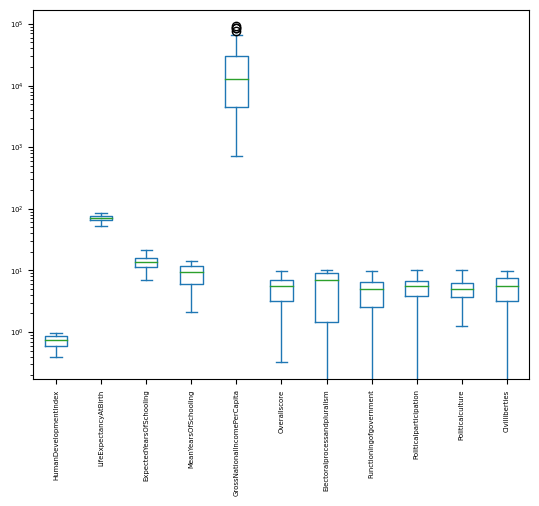

In [98]:
import matplotlib.pyplot as plt

hdidem.plot(kind='box', rot=90,fontsize=5)
plt.semilogy();

Notice that our concern is the numeric data. In case of categorical it is unusual to worry about it, but some cases might need some thinking.

Let me get the column names of the numeric columns:

In [100]:
import numpy as np

colsToScale = hdidem.select_dtypes([np.number]).columns

colsToScale

Index(['HumanDevelopmentIndex', 'LifeExpectancyAtBirth',
       'ExpectedYearsOfSchooling', 'MeanYearsOfSchooling',
       'GrossNationalIncomePerCapita', 'Overallscore',
       'Electoralprocessandpluralism', 'Functioningofgovernment',
       'Politicalparticipation', 'Politicalculture', 'Civilliberties'],
      dtype='object')

Time to produce new ranges (make sure you have previously install **scikit-learn**):

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax = scaler.fit_transform(hdidem.loc[:,colsToScale].to_numpy())
df_scaled = pd.DataFrame(df_minmax, columns=colsToScale)

Let's explore the result:

In [115]:

df_scaled.describe().loc[['min','max']].T 


,min,max
HumanDevelopmentIndex,0.0,1.0
LifeExpectancyAtBirth,0.0,1.0
ExpectedYearsOfSchooling,0.0,1.0
MeanYearsOfSchooling,0.0,1.0
GrossNationalIncomePerCapita,0.0,1.0
Overallscore,0.0,1.0
Electoralprocessandpluralism,0.0,1.0
Functioningofgovernment,0.0,1.0
Politicalparticipation,0.0,1.0
Politicalculture,0.0,1.0


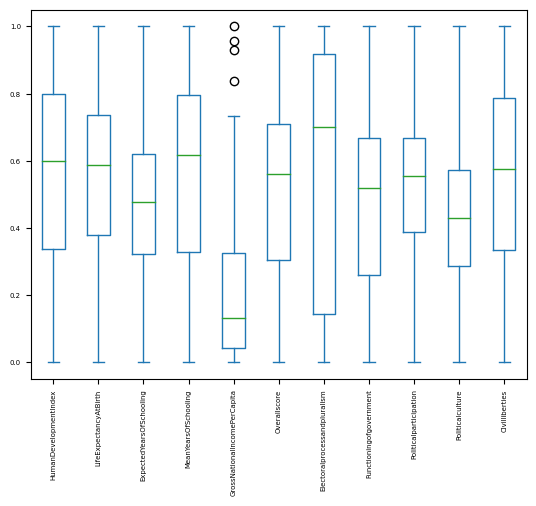

In [116]:
df_scaled.plot(kind='box', rot=90,fontsize=5);

Let's add a suffix to the column names:

In [117]:
df_scaled.columns=df_scaled.columns+"_mM"

In [119]:
# concat to the right (instead of bottom) with axis=1
pd.concat([hdidem,df_scaled],axis=1)

,Country,HumanDevelopmentIndex,LifeExpectancyAtBirth,ExpectedYearsOfSchooling,MeanYearsOfSchooling,GrossNationalIncomePerCapita,Regimetype,Overallscore,Electoralprocessandpluralism,Functioningofgovernment,...,LifeExpectancyAtBirth_mM,ExpectedYearsOfSchooling_mM,MeanYearsOfSchooling_mM,GrossNationalIncomePerCapita_mM,Overallscore_mM,Electoralprocessandpluralism_mM,Functioningofgovernment_mM,Politicalparticipation_mM,Politicalculture_mM,Civilliberties_mM
0,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,Full democracy,8.90,9.58,8.93,...,0.954893,0.676943,0.980686,0.734045,0.909862,0.958,0.926349,0.778,0.929143,0.908342
1,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,Full democracy,9.75,10.00,9.64,...,0.932029,0.796461,0.909207,0.708843,1.000000,1.000,1.000000,1.000,1.000000,0.939238
2,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,Full democracy,9.18,10.00,8.21,...,0.915163,0.865825,0.972963,0.610402,0.939555,1.000,0.851660,0.889,0.929143,0.969104
3,Hong Kong,0.952,85.4734,17.278170,12.226210,62606.845400,Hybrid regime,5.60,2.75,3.64,...,1.000000,0.732121,0.844292,0.686076,0.559915,0.275,0.377593,0.556,0.714286,0.878476
4,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,Full democracy,8.90,10.00,8.57,...,0.971261,1.000000,0.886093,0.537846,0.909862,1.000,0.889004,0.778,0.857143,0.969104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Mali,0.428,58.9414,7.423038,2.310000,2132.629443,Authoritarian,3.48,2.42,0.00,...,0.194731,0.033050,0.016286,0.015533,0.335101,0.242,0.000000,0.556,0.500571,0.393409
154,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,Authoritarian,2.13,0.00,0.00,...,0.277325,0.267112,0.084695,0.000000,0.191941,0.000,0.000000,0.389,0.428571,0.181256
155,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,Authoritarian,1.43,1.25,0.00,...,0.041559,0.076826,0.185290,0.002598,0.117709,0.125,0.000000,0.167,0.072000,0.242019
156,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,Authoritarian,3.22,2.00,1.14,...,0.274703,0.000000,0.000147,0.005634,0.307529,0.200,0.118257,0.389,0.357714,0.485067


So this is our last version:

In [125]:
hdidem_plus=pd.concat([hdidem,df_scaled],axis=1)

[Home](#home)
______


<a id='exporting'></a>

### Exporting

#### For future use in Python:

In [122]:
hdidem_plus.to_pickle("hdidem_plus.pkl")
# you will need: DF=pd.read_pickle("hdidem_plus.pkl")
# or:
# from urllib.request import urlopen
# DF=pd.read_pickle(urlopen("https://...../hdidem_plus.pkl"),compression=None)

#### For future  use in R:

In [123]:
!pip show rpy2

Name: rpy2
Version: 3.5.7
Summary: Python interface to the R language (embedded R)
Home-page: 
Author: 
Author-email: Laurent Gautier <lgautier@gmail.com>
License: GPLv2+
Location: /Users/JoseManuel/opt/anaconda3/envs/WinterSchool-3_11/lib/python3.11/site-packages
Requires: cffi, jinja2, pytz, tzlocal
Required-by: 


In [124]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(hdidem_plus,file="hdidem_plus.RDS")

#In R, you call it with: DF = readRDS("hdidem_plus.RDS")
#or, if read from cloud: DF = readRDS(url("https://...../hdidem_plus.RDS")

<rpy2.rinterface_lib.sexp.NULLType object at 0x1605baf10> [0]